In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np

In [2]:
# time.sleep(30)

In [3]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines

for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "MAKWest.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com


## Set number of clusters

In [4]:
nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)


total_count = 8


nreplicas = int(total_count/nclusters)
nodeIps = lines[:nclusters* nreplicas]

nclients = 2

# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]




# clientIps = lines[-(nclusters):]
clientIps = lines[-nclients:]



2


In [5]:
clientIps, no_cluster_yet_nodes

(['127.0.0.1', '127.0.0.1'], [])

## Functions

In [6]:
def setup(i):

    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'commands.sh'+' ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:commands.sh'
        
        
        os.system(command)

        
def compile_job(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ./gradlew installDist'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = lines[i]
    
#     rm_command = 'sudo rm config/currentView; '
#     for iter_ in range(nclusters):
#         rm_command = rm_command + 'rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S rm ../dump_files/nohup*.out; echo 1234 | sudo -S rm config*/currentView;'
        
        
        os.system(command)
        
        

        
def run_server_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 & echo $! > ../dump_files/jobID_s'+str(i)+'.txt'
        
        
        os.system(command)
        
        
        
    if ip!='None' and( ip in no_cluster_yet_nodes):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)        
#         print(command)



def run_basic_client(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
#     if ip!='None' and ip in nodeIps[1:1+len(clientIps)]:
        
        current = (ip.split('.'))
        
#         cmd_arg = nodeIps[1:1+len(clientIps)].index(ip)
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(i-len(nodeIps)-len(no_cluster_yet_nodes))+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        os.system(command)


def kill_java(i):
    ip = lines[i]
    
    if ip!='None':
        current = (ip.split('.'))
        command = ' killall java; killall nohup'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'killall java;  killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = ' nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        print(command)

# for i in range(len(lines)):
#     run_basic_client_check(i)



def join_node1(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11080 11081 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)   
        
        
def join_node2(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11090 11091 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 
        
def join_node3(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11100 11101 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 

## Compile Job

## Setup Client and nodeIPS

In [7]:
len(lines)

10

In [8]:
len(nodeIps), len(clientIps)

(8, 2)

## RUN SERVERS

In [9]:
for i in range(len(lines)):
    kill_java(i)

for i in range(len(lines)):
    clean_job(i)
    
compile_job(1)



java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitte


> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 executed


Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


In [10]:
    
for i in range(len(lines)-nclients-len(no_cluster_yet_nodes)):
    print(i)
    run_server_node(i)

0
1
2
3
4
5
6
7


In [11]:
time.sleep(30)
!tail ../dump_files/nohup_s0.out -n 50

-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@41692fa7 with it being OtherClusterMessage=false
-- currentConsensusIdAsked activated
-- Received CID query from 2 with ID 5
-- Going to send back response to CID query with CID: -1
-- --> 3: sending SystemMessage message from: bftsmart.statemanagement.standard.StandardSMMessage@7a797de9 -> [2]
-- Sending message from:0 -> to:2.
-- Sent CID reply to replica 2 with ID 5
-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@e349d2f with it being OtherClusterMessage=false
-- currentConsensusIdAsked activated
-- Received CID query from 3 with ID 5
-- Going to send back response to CID query with CID: -1
-- --> 3: sending SystemMessage message from: bftsmart.statemanagement.standard.StandardSMMessage@6a89f59 -> [3]
-- Sending message from:0 -> to:3.
-- Sent CID reply to replica 3 with ID 5
-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@7c901824 with it being OtherClusterM

In [12]:


# for i in range(len(lines)):
#     kill_java(i)

In [13]:
len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)


10

## Run basic client

In [14]:
for i in range(len(nodeIps)+len(no_cluster_yet_nodes),len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)):
    run_basic_client(i)

In [15]:
time.sleep(180)

In [16]:

# time.sleep(30)
# run_server_node(8)
# time.sleep(15)
# join_node1(8)

# time.sleep(30)
# run_server_node(9)

# time.sleep(30)
# join_node2(9)

# time.sleep(30)
# run_server_node(10)
# time.sleep(30)
# join_node3(10)

In [17]:
# time.sleep(50)

# run_server_node(9)

# time.sleep(160)
# join_node2(9)


# for i in [2]:
#     os.system('kill -9 `cat ../dump_files/jobID_s2.txt`')
    


# time.sleep(80)



for i in range(len(lines)):
    kill_java(i)
    


java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java

In [18]:
# for i in range(len(lines)):
#     kill_java(i)

## Main Job

In [19]:

def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())


            read_lat = '0'
            write_lat = '0'

            if ('READ AverageLatency' in line):

                print(line)

                read_lat = line.split('READ AverageLatency(us)=')[1].split(']')[0].strip()


            if ('UPDATE AverageLatency' in line):                    

                write_lat = line.split('UPDATE AverageLatency(us)=')[1].split(']')[0].strip()


            if (('READ AverageLatency' not in line) and ('UPDATE AverageLatency' not in line)):
                latencies.append(line.split('=')[1].split(']')[0].strip())
            else:
                read_frac = 0
                write_frac = 0

                if float(read_lat) > 0:
                    read_frac = 0.85

                if float(write_lat) > 0:
                    write_frac = 0.15

#                         print(line, write_frac, read_frac, float(read_lat), float(write_lat))

                lat = str( (write_frac * float(write_lat) +\
                            read_frac*float(read_lat))/(write_frac+read_frac)\
                         )
                latencies.append(lat)

            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  


In [20]:
## Byzantine Remote View Change

In [21]:
times ,thputs, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out')
times2 ,thputs2, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes)+1)+'.out')


'../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out'

 1 sec: 3 operations; 2.98 current ops/sec; [UPDATE AverageLatency(us)=169438] 
 169438.0 2.98 1
 2 sec: 22 operations; 18.92 current ops/sec; [UPDATE AverageLatency(us)=51564.53] 
 51564.53 18.92 2
 3 sec: 47 operations; 24.98 current ops/sec; [UPDATE AverageLatency(us)=41441.4] 
 41441.4 24.98 3
 4 sec: 72 operations; 24.85 current ops/sec; [UPDATE AverageLatency(us)=39916.36] 
 39916.36 24.85 4
 5 sec: 103 operations; 31 current ops/sec; [UPDATE AverageLatency(us)=32590.58] 
 32590.580000000005 31 5
 6 sec: 141 operations; 37.96 current ops/sec; [UPDATE AverageLatency(us)=25767.26] 
 25767.26 37.96 6
 7 sec: 182 operations; 41 current ops/sec; [UPDATE AverageLatency(us)=24600.78] 
 24600.78 41 7
 8 sec: 245 operations; 63 current ops/sec; [UPDATE AverageLatency(us)=15738.24] 
 15738.24 63 8
 9 sec: 323 operations; 77.92 current ops/sec; [UPDATE AverageLatency(us)=12951.81] 
 12951.81 77.92 9
 10 sec: 399 operations; 76 current ops/sec; [UPDATE AverageLatency(us)=13083.3] 
 13083.3 7

'../dump_files/nohup_c8.out'

In [22]:
# times - times2

In [23]:
# thputs = thputs + thputs2

In [24]:
# np.mean(lats[20:]) # 23604.83205128205

In [25]:
np.mean(lats[20:])

0.010679105251798562

In [26]:
lats

array([0.185353  , 0.05338479, 0.04092472, 0.03793528, 0.03477587,
       0.02582346, 0.024455  , 0.01574395, 0.01299979, 0.01297493,
       0.01521485, 0.01241551, 0.01038521, 0.01065654, 0.01014771,
       0.0101977 , 0.00797819, 0.00851431, 0.00803581, 0.0098035 ,
       0.0089572 , 0.00761943, 0.00829959, 0.00849432, 0.00767847,
       0.00724651, 0.00718055, 0.00759727, 0.00746938, 0.00807471,
       0.00909738, 0.01181121, 0.00753437, 0.00699366, 0.00796943,
       0.0081792 , 0.00918884, 0.00685858, 0.00709594, 0.00891892,
       0.00694656, 0.00658351, 0.00673114, 0.00691258, 0.00720446,
       0.00665325, 0.0067662 , 0.00661701, 0.55287857, 0.00893019,
       0.00850885, 0.00856609, 0.01138222, 0.01026025, 0.00813186,
       0.00668025, 0.00661883, 0.00694954, 0.00714897, 0.00742852,
       0.00788696, 0.0078342 , 0.00786839, 0.00683212, 0.00639266,
       0.00638759, 0.00626164, 0.00792734, 0.00781052, 0.00678269,
       0.00624236, 0.00670411, 0.00622507, 0.00630396, 0.00646

In [27]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


In [28]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# # pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# # pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


In [29]:
times_new = [x for x in range(180)]
thputs_new = [0 for x in range(180)]
for idx, t in enumerate(times):
    thputs_new[int(t)] = thputs[idx]
    

times_new, thputs_new

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

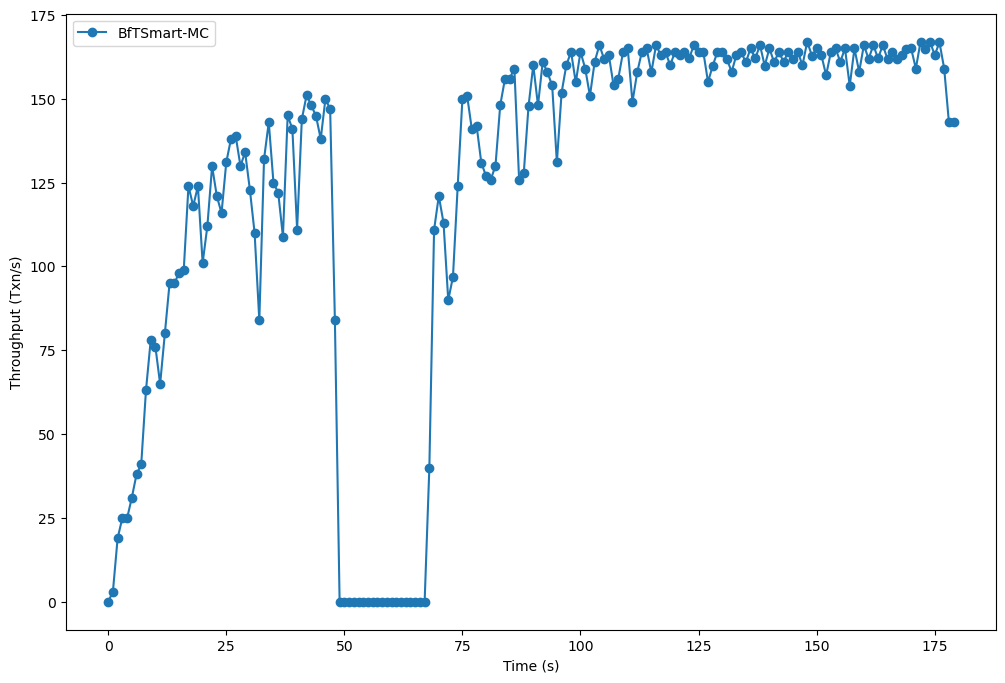

<Figure size 640x480 with 0 Axes>

In [30]:
import pylab as pl

pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
pl.plot(times_new[:], thputs_new[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
pl.show()
pl.clf()


In [31]:
(thputs), np.sum(thputs)

(array([  2.98,  18.92,  24.98,  24.85,  31.  ,  37.96,  41.  ,  63.  ,
         77.92,  76.  ,  64.94,  80.  ,  95.  ,  94.91,  98.  ,  98.9 ,
        124.  , 118.  , 123.88, 101.  , 112.  , 129.87, 121.  , 115.88,
        131.  , 138.  , 138.86, 130.  , 134.  , 122.88, 110.  ,  83.92,
        132.  , 143.  , 124.88, 122.  , 108.89, 145.  , 141.  , 111.  ,
        143.86, 151.  , 148.  , 144.86, 138.  , 150.  , 146.85,  84.  ,
         40.  , 110.89, 121.  , 113.  ,  89.91,  96.9 , 123.88, 150.  ,
        150.85, 140.86, 142.  , 130.87, 127.  , 125.87, 130.  , 148.  ,
        155.84, 156.  , 159.  , 125.87, 128.  , 147.85, 160.  , 148.  ,
        161.  , 157.84, 154.  , 131.  , 151.85, 160.  , 164.  , 154.85,
        164.  , 159.  , 150.85, 161.  , 166.  , 161.84, 163.  , 154.  ,
        156.  , 163.84, 165.  , 149.  , 157.84, 164.  , 165.  , 157.84,
        166.  , 163.  , 163.84, 160.  , 164.  , 163.  , 163.84, 162.  ,
        166.  , 163.84, 164.  , 155.  , 159.84, 164.  , 164.  , 

In [32]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()
